# MACS30000 Assignment 2

## Jiaxu Han

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

#turn off notebook package warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Imputing age and gender

### (a) 
Both BestIncome and SurveyIncome dataset have "weight" as a variable. From the descriptive statistics of both datasets, we can see that the mean of total income (64871.210860) is about the same as the sum of mean capital income (57052.925133) and mean labor income (9985.798563). If we would like to impute age and gender variables from SurveyIncome to BestIncome, my strategy is to analyze the relationship among weight, total income, age and gender from SurveyIncome dataset, and use that information to infer the age and gender of people in BestIncome dataset since weight, capital income and labor income was given in that dataset. 

In order to build models to model the relationship among age, gender and weight, we start by visualizing the data to acquire a sense of what the relationships among those variables (weight, age, and gender) look like. 

The first plot depicted the relationship between weight and gender. Since gender is a categorical variable, here we apply logistic regression model to depict the relationship between gender, weight and total income: 

gender = e ** (a + b*weight + c* total_income )/(e**(a + b*weight + c*total_income)+1).

The dependent variable (gender) indicates the probability of being female given a certain weight and . If 'gender' is above 0.5, we would infer that the person is a female, otherwise, we infer that the person is a male. 

The second plot dipicted the relationship between age and weight. Adding total income as an additional independent variable, we have a regression model to predict age:

age = a + b * weight + c * total income

Once we have the parameters in both models proposed above by analyzing SurveyIncome dataset, we would use that to first infer the gender given weight, capital income and labor income value in BestIncome dataset. Then, we use the linear regression models to infer age given weight, capital income and labor income value in BestIncome dataset.

In [2]:
#read in data and name variables
best_income = pd.read_csv('BestIncome.txt', names = ['lab_inc', 'cap_inc', 'hgt', 'wgt'])
survey_income = pd.read_csv('SurvIncome.txt', names = ['tot_inc', 'wgt', 'age', 'gender'])

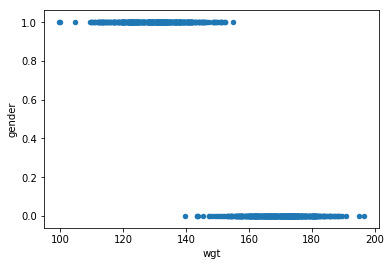

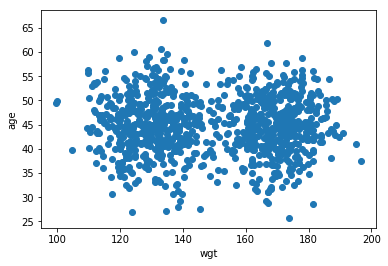

In [3]:
# visualize the relationship between gender, weight and age
survey_income.plot('wgt', 'gender', kind = 'scatter')
plt.show()
plt.scatter(survey_income.wgt, survey_income.age)
plt.xlabel('wgt')
plt.ylabel('age')
plt.show()

In [4]:
# descriptive statistics
print(survey_income.describe())

            tot_inc          wgt          age      gender
count   1000.000000  1000.000000  1000.000000  1000.00000
mean   64871.210860   149.542181    44.839320     0.50000
std     9542.444214    22.028883     5.939185     0.50025
min    31816.281649    99.662468    25.741333     0.00000
25%    58349.862384   130.179235    41.025231     0.00000
50%    65281.271149   149.758434    44.955981     0.50000
75%    71749.038000   170.147337    48.817644     1.00000
max    92556.135462   196.503274    66.534646     1.00000


In [5]:
print(best_income.describe())

            lab_inc       cap_inc           hgt           wgt
count  10000.000000  10000.000000  10000.000000  10000.000000
mean   57052.925133   9985.798563     65.014021    150.006011
std     8036.544363   2010.123691      1.999692      9.973001
min    22917.607900   1495.191896     58.176154    114.510700
25%    51624.339880   8611.756679     63.652971    143.341979
50%    56968.709935   9969.840117     65.003557    149.947641
75%    62408.232277  11339.905773     66.356915    156.724586
max    90059.898537  19882.320069     72.802277    185.408280


### (b)

In [6]:
#logistic regression
logmodel = smf.logit(formula = "gender ~ wgt + tot_inc", data = survey_income).fit()
print(logmodel.summary())

Optimization terminated successfully.
         Current function value: 0.036050
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 gender   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Tue, 16 Oct 2018   Pseudo R-squ.:                  0.9480
Time:                        21:39:33   Log-Likelihood:                -36.050
converged:                       True   LL-Null:                       -693.15
                                        LLR p-value:                4.232e-286
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.7929     10.569      7.266      0.000      56.078      97.508
wgt           -0.4460      0

In [7]:
#linear regression
outcome = 'age'
features = ['wgt','tot_inc']
x,y = survey_income[features], survey_income[outcome]
x = sm.add_constant(x, prepend = False)
m = sm.OLS(y, x)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6326
Date:                Tue, 16 Oct 2018   Prob (F-statistic):              0.531
Time:                        21:39:36   Log-Likelihood:                -3199.4
No. Observations:                1000   AIC:                             6405.
Df Residuals:                     997   BIC:                             6419.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wgt           -0.0067      0.010     -0.686      0.4

In [8]:
#prediction of model

#impute gender variable in BestIncome dataset
best_income['tot_inc'] = best_income['cap_inc'] + best_income['lab_inc']

best_income['gender'] = logmodel.predict(best_income[['wgt','tot_inc']])

for i in range(len(best_income)):
    if best_income['gender'][i] >= 0.5:
        best_income['gender'][i] = 1
    else:
        best_income['gender'][i] = 0

In [9]:
print(best_income.describe())

            lab_inc       cap_inc           hgt           wgt       tot_inc  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean   57052.925133   9985.798563     65.014021    150.006011  67038.723697   
std     8036.544363   2010.123691      1.999692      9.973001   8294.497996   
min    22917.607900   1495.191896     58.176154    114.510700  33651.691815   
25%    51624.339880   8611.756679     63.652971    143.341979  61452.517672   
50%    56968.709935   9969.840117     65.003557    149.947641  67042.751487   
75%    62408.232277  11339.905773     66.356915    156.724586  72636.874684   
max    90059.898537  19882.320069     72.802277    185.408280  98996.053756   

             gender  
count  10000.000000  
mean       0.454600  
std        0.497959  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  


In [10]:
#impute age variable in BestIncome dataset
best_income['age']=np.zeros(len(best_income))

def get_age(wgt, tot_inc):
    age = -0.0067 * wgt + 2.52*(10**(-5))*tot_inc + 44.2097
    return age
    
for i in range(len(best_income)):
    best_income['age'][i] = get_age(best_income['wgt'][i],best_income['tot_inc'][i])
    

In [11]:
print(best_income.head())

        lab_inc       cap_inc        hgt         wgt       tot_inc  gender  \
0  52655.605507   9279.509829  64.568138  152.920634  61935.115336     0.0   
1  70586.979225   9451.016902  65.727648  159.534414  80037.996127     0.0   
2  53738.008339   8078.132315  66.268796  152.502405  61816.140654     0.0   
3  55128.180903  12692.670403  62.910559  149.218189  67820.851305     0.0   
4  44482.794867   9812.975746  68.678295  152.726358  54295.770612     1.0   

         age  
0  44.745897  
1  45.157777  
2  44.745701  
3  44.919024  
4  44.554687  


### (c)
From the results below, we can see that the mean age is 44.894036; standard deviation of age is 0.219066; the minimum age is 43.980016; the maximum age is 45.706849; and the number of observation is 10000. 

The mean gender is 0.454600; the standard deviation of gender is 0.497959; the minimum gender is 0.000000(i.e. male) and the maximum gender is 1.000000(i.e. female); and the number of observation is 10000.

In [12]:
print(best_income['age'].describe())

count    10000.000000
mean        44.894036
std          0.219066
min         43.980016
25%         44.747065
50%         44.890281
75%         45.042239
max         45.706849
Name: age, dtype: float64


In [13]:
print(best_income['gender'].describe())

count    10000.000000
mean         0.454600
std          0.497959
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: gender, dtype: float64


### (d) correlation matrix for the now six variables

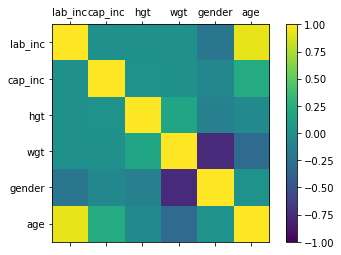

,lab_inc,cap_inc,hgt,wgt,gender,age
lab_inc,1,0.0053253,0.00278978,0.00450691,-0.215469,0.924329
cap_inc,0.0053253,1,0.0215716,0.00629868,-0.0625691,0.234234
hgt,0.00278978,0.0215716,1,0.172103,-0.127416,-0.0449272
wgt,0.00450691,0.00629868,0.172103,1,-0.763821,-0.299395
gender,-0.215469,-0.0625691,-0.127416,-0.763821,1,0.0193158
age,0.924329,0.234234,-0.0449272,-0.299395,0.0193158,1


In [14]:
del best_income['tot_inc'] 

# Correlation Matrix Plot
def corr_plot(df):
    names = df.columns
    N = len(names)
    
    correlations = df.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,N,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

   
corr_plot(best_income)

#Matrix Form
corr = best_income.corr()
corr.style.background_gradient()

## 2. Stationarity and Data Drift

### (a) Estimate by OLS and report coefficients

In [15]:
# read in data and name variable
incomeintel = pd.read_csv("IncomeIntel.txt",names = ['grad_year', 'gre_qnt', 'salary_p4'])

In [16]:
print(incomeintel.describe())

         grad_year      gre_qnt      salary_p4
count  1000.000000  1000.000000    1000.000000
mean   2006.994000   596.510118   74173.293777
std       3.740582   242.361960   12173.767372
min    2001.000000   141.261398   43179.183141
25%    2004.000000   684.983551   65778.240317
50%    2007.000000   719.106878   73674.204810
75%    2010.000000   739.332537   81838.874129
max    2013.000000   799.715533  115367.665815


In [17]:
# regression model
x = incomeintel['gre_qnt']
y = incomeintel['salary_p4']

x = sm.add_constant(x, prepend = False)
m = sm.OLS(y,x)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              salary_p4   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     356.3
Date:                Tue, 16 Oct 2018   Prob (F-statistic):           3.43e-68
Time:                        21:41:06   Log-Likelihood:                -10673.
No. Observations:                1000   AIC:                         2.135e+04
Df Residuals:                     998   BIC:                         2.136e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gre_qnt      -25.7632      1.365    -18.875      0.0

#### From above table, the coefficients for the regression model are:  -25.7632 for gre_qnt with standard error of 1.365 and it was statistically significant; 8.954e+04 with standard error of 878.764.

### (b) Scatterplot of GRE score and graduation year

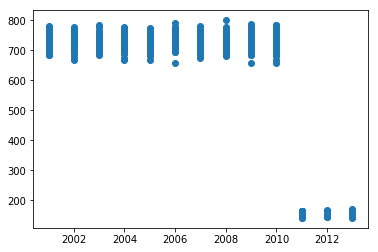

In [18]:
plt.scatter(incomeintel['grad_year'], incomeintel['gre_qnt'])
plt.show()

The GRE quantitative scoring scale changed in 2011: the full score of GRE quantitative test was 800 and it became 170 since 2011. Therefore, in the plot we can see that scores after 2010 dropped significantly. Such system drift would cause algorithmic confounding when we use it to do regression in (a) without any modification, beacuse the sudden drop of scores in 2011 was not a result of people's behavior but a result of systemic change. 

Therefore, in order to solve this problem, we need to convert the new scale to the old scale to make sure that the dependent variable (gre_gnt) was systemically consistent over the years. Since the old gre scale was from 200 to 800 and the new gre scale is from 130 to 170. Given one's new gre score x, his/her old gre score y would be y = x/170*800. After converting the new scale to the old scale, we will use the converted gre score as the new dependent variable to do regression again. 

In [19]:
def conversion (new_gre_score):
    old_gre_score = new_gre_score/170*800
    return old_gre_score

for i, val in enumerate(incomeintel['gre_qnt']):
    if val < 200:
        incomeintel['gre_qnt'][i] = conversion(val)
        
#linear regression model        
x = incomeintel['gre_qnt']
y = incomeintel['salary_p4']

x = sm.add_constant(x, prepend = False)
m = sm.OLS(y,x)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              salary_p4   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06026
Date:                Tue, 16 Oct 2018   Prob (F-statistic):              0.806
Time:                        21:41:12   Log-Likelihood:                -10825.
No. Observations:                1000   AIC:                         2.165e+04
Df Residuals:                     998   BIC:                         2.166e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gre_qnt       -4.0048     16.315     -0.245      0.8

         grad_year      gre_qnt      salary_p4
count  1000.000000  1000.000000    1000.000000
mean   2006.994000   728.534611   74173.293777
std       3.740582    23.619014   12173.767372
min    2001.000000   655.702537   43179.183141
25%    2004.000000   712.274822   65778.240317
50%    2007.000000   727.910127   73674.204810
75%    2010.000000   744.392487   81838.874129
max    2013.000000   800.000000  115367.665815


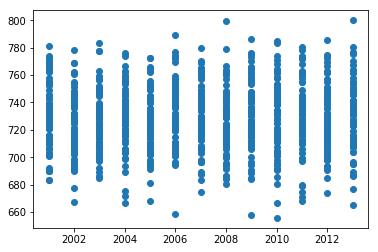

In [20]:
print(incomeintel.describe())
plt.scatter(incomeintel['grad_year'], incomeintel['gre_qnt'])
plt.show()

### (c) Create a scatterplot of income and graduation year

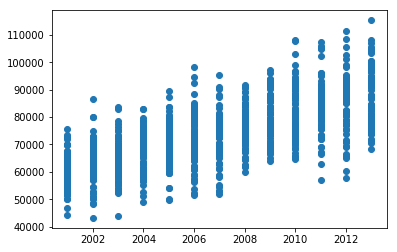

In [21]:
plt.scatter(incomeintel['grad_year'], incomeintel['salary_p4'])
plt.show()

Because these data are not panel data, i.e. the persons observed every year are not the same, we cannot use differencing or log differencing methods to detrend them here. 

The solution here is to: (1) treat the first year of the data year = 2001 equal to the base year. (2) calculate the average growth rate in salary by calculating the mean salary each year and then calculating the average growth rate in salaries across 13 years.(3)to stationary the data, we divide each salary by (1 + average growth rate) ** (graduate year - 2001)

In [22]:
avg_inc_by_year = incomeintel['salary_p4'].groupby(incomeintel['grad_year']).mean()

avg_growth_rate = []
for i in range(2001, 2013):
    val = (avg_inc_by_year[i+1] - avg_inc_by_year[i])/avg_inc_by_year[i]
    avg_growth_rate.append(val)
avg_growth_rate = np.mean(avg_growth_rate)

salary_p4_new = []
for i, y in enumerate(incomeintel['grad_year']):
    salary_p4_new.append(incomeintel['salary_p4'][i]/((1+avg_growth_rate)**(y-2001)))
    
grad_year = incomeintel['grad_year']
grad_year = sm.add_constant(grad_year, prepend = False)
model_rev = sm.OLS(salary_p4_new,grad_year)
res = model_rev.fit()
print(res.summary())

incomeintel['salary_p4_new'] = salary_p4_new

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2937
Date:                Tue, 16 Oct 2018   Prob (F-statistic):              0.588
Time:                        21:41:17   Log-Likelihood:                -10291.
No. Observations:                1000   AIC:                         2.059e+04
Df Residuals:                     998   BIC:                         2.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grad_year     32.7192     60.376      0.542      0.5

### (d) 

In [23]:
x = incomeintel['gre_qnt']
y = incomeintel['salary_p4_new']

x = sm.add_constant(x, prepend = False)
m = sm.OLS(y,x)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_p4_new   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6043
Date:                Tue, 16 Oct 2018   Prob (F-statistic):              0.437
Time:                        21:41:19   Log-Likelihood:                -10291.
No. Observations:                1000   AIC:                         2.059e+04
Df Residuals:                     998   BIC:                         2.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gre_qnt       -7.4321      9.560     -0.777      0.4

#### From above table, the new estimated coefficients for gre score  now become -7.4321 with standard error of 9.560; and 6.683e+04 for the constant with standard error of 2020.482. The gre score and salary had a statistically significant negative relationship in part (a) with coefficient of -25.7642, and now though they still have a negative relationship, it is NOT statitically significant. In part (a), the IncomeIntel dataset had both systemic drifting (with gre scale changes) and population drifting for salary. Therefore, the regression model was biased in part (a). After rescaling the gre data and stationary the salary in the dataset, we are able to better predict the relationship between salary and gre score here. 

#### In the new model, the negative relationship between gre score and salary was not statistically significant with p-value = 0.437 for the coefficient. The new model does not provide evidence to support the hypothesis that "higher intelligence is associated with higher income".

## 3. Assessment of Kossinets and Watts (2009)

Kossinets and Watts (2009) were interested in the origins of homophily. The main research question of this paper is: the observed choices of interaction partners and homogeneity of structurally proximate positions are a result of structural proximity or a result of individual preference for similarity?

Three sources of data were incorporated into the study: (1) the logs of e-mail interactions within the university over one academic year, (2) a database of individual attributes(status, gender, age, department, number of years in the community, etc.), and (3) records of course registration, in which courses were recorded separately for each semester.

To answer the question of how many observations in the research study, we need to clarify the observed object first. If the object is each individual (stable e-mail users), then there are 30,396 observations used in the analysis. If the object is the e-mail message that is exchanged, then there are 7,156,162 observations were recorded. In addition, the data spans 270 days.

In this paper, Appendix A provides a detailed description and definition of all the variables.

A potential problem from the data cleaning process is that the researchers only included messages that were sent to a single recipeint other than the sender to make sure that the data represent interpersonal communication. Such data cleaning process resulted in excluding 12% of all emails. Though it makes sense that a student send a message to himself/herself cannot be accounted for interpersonal communication, but there might be many group messages that would be helpful in terms of answering the research question. For example, a research lab often has group emails to coordinate, a student who wants to hold a party may send group emails to schedule time, and students may send group emails to do group projects. More importantly, many people might make friends and have more interpersonal communications via joining these group activities. In sum, excluding these data might lead to a loss of unique reource that represent homophily.

In the paper, the researchers used email logs linked to other characteristics of senders and receivers as the data to match the theoretical construct of "social relationship". Though it is a good and convenient source of data to use, it has its own weaknesses. For example, e-mail exchanges comprise discrete and intermittent "spike trains" that are often "bursty" in nature (Kossinets & Watts, 2009), which makes it difficult to observe the development of social network over continuous time frame. To address this problem, the researchers applied a method called a sliding window filter. The method used the geometric average of the number of messages exchanged by users i and j per unit of time, summed over the past t time units to define the instantaneous strength betwen an interacting dyad.